#### Mengimport Library yang di perlukan

In [38]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
from keras import Sequential
from keras.layers import Dense

#### Membaca file dataset 

In [39]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#### Mengecek data duplicate

In [41]:
df.isnull().sum()


ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

#### Menghapus Kolom

In [42]:
df.drop(['ID'], axis=1, inplace=True)

#### Mengubah data kategori(object) menjadi numerik

In [43]:
col=['AGE','GENDER','RACE','INCOME','DRIVING_EXPERIENCE','EDUCATION','VEHICLE_YEAR','VEHICLE_TYPE']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

#### Menghapus Data Duplikat

In [44]:
imputer_mean = SimpleImputer(strategy='mean')
df["ANNUAL_MILEAGE"] = imputer_mean.fit_transform(df[["ANNUAL_MILEAGE"]])

imputer_mean = SimpleImputer(strategy='mean')
df["CREDIT_SCORE"] = imputer_mean.fit_transform(df[["CREDIT_SCORE"]])

#### Membersihkan Outliers

In [45]:
df = df[(np.abs(stats.zscore(df.select_dtypes(['int64' , 'float64']))) < 3).all(axis=1)]

####  SPLIT DATASET

In [46]:
X = df[['CREDIT_SCORE','ANNUAL_MILEAGE']]
y = df[['OUTCOME']]
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Preprocessing pada data split

In [47]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [48]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
X_train.shape

(7055, 2)

#### COMPILE DAN LATIH MODEL

In [50]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[2]), #Input Layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output Layer
    # layers.Dense(2, activation='softmax')
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Melakukan fit pada model

In [51]:
history = model.fit(X_train, y_train, epochs = 50,validation_split=0.2)


Epoch 1/50


177/177 [==============================] - 3s 5ms/step - loss: 0.6139 - accuracy: 0.6751 - val_loss: 0.5864 - val_accuracy: 0.6761
Epoch 2/50
177/177 [==============================] - 1s 3ms/step - loss: 0.5818 - accuracy: 0.6967 - val_loss: 0.5738 - val_accuracy: 0.7030
Epoch 3/50
177/177 [==============================] - 1s 3ms/step - loss: 0.5785 - accuracy: 0.7023 - val_loss: 0.5723 - val_accuracy: 0.7130
Epoch 4/50
177/177 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.6995 - val_loss: 0.5721 - val_accuracy: 0.7052
Epoch 5/50
177/177 [==============================] - 1s 3ms/step - loss: 0.5766 - accuracy: 0.7025 - val_loss: 0.5726 - val_accuracy: 0.7066
Epoch 6/50
177/177 [==============================] - 1s 4ms/step - loss: 0.5772 - accuracy: 0.7025 - val_loss: 0.5734 - val_accuracy: 0.6974
Epoch 7/50
177/177 [==============================] - 1s 3ms/step - loss: 0.5768 - accuracy: 0.7006 - val_loss: 0.5708 - val_accuracy: 0.7080
Epoch 8/50
177/17

#### Mengecek akurasi

In [52]:
y_pred = model.predict(X_test)

56/56 [==============================] - 0s 3ms/step


In [53]:
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7126


[0.564227819442749, 0.7125850319862366]

In [54]:
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

In [55]:
accuracy_score(y_test, y_pred)

0.7125850340136054

#### GRAFIK

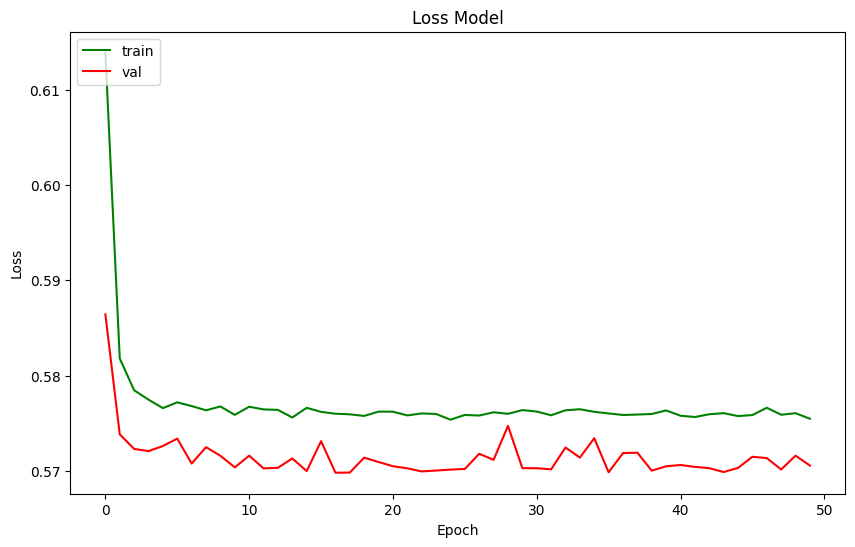

In [56]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'], color='red')
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

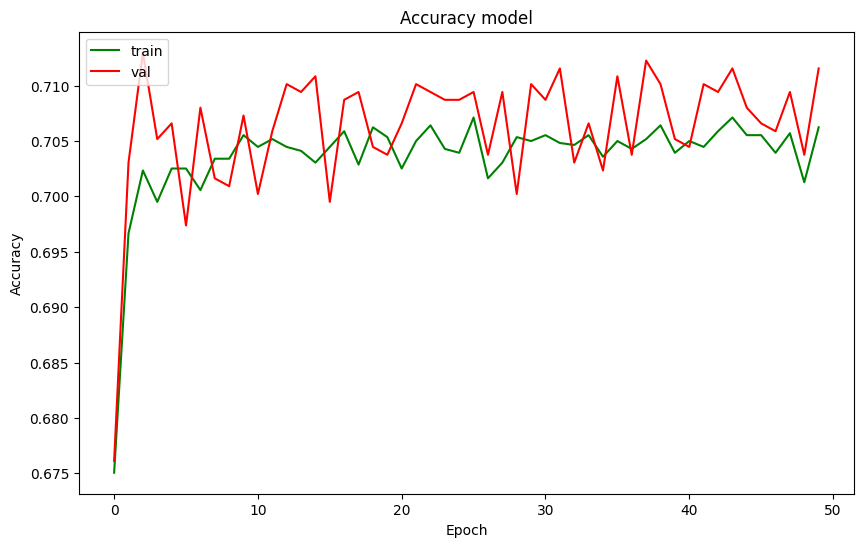

In [57]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()